## Train a Fully connected Neural Network on Fashion MNIST dataset

In [1]:
#importing the files
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

### Dataset

In [2]:
# Split the data into x_train, y_train, x_test and y_test.
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

###Split the data into x_train, y_train, x_test and y_test.

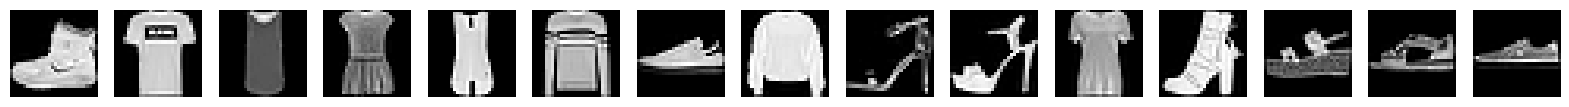

In [3]:
#Display the sample images from x_train
import matplotlib.pyplot as plt

# Number of digits to display
n=15
plt.figure(figsize=(20,5))

# Loop through the first 'n' images
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(X_train[i].reshape(28,28))
  plt.gray()
  plt.axis('off')


plt.show()
plt.close()

In [4]:
#Display the shape of x_train and y_train
print('X_train shape:{} \nY_train shape:{}'.format(X_train.shape, Y_train.shape))

X_train shape:(60000, 28, 28) 
Y_train shape:(60000,)


###Flatten the images

In [5]:
#Reshape the images from 28x28 to 784-dimension vector.
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000, 784)

print('X_train shape:{} \nX_test shape:{}'.format(X_train.shape, X_test.shape))

X_train shape:(60000, 784) 
X_test shape:(10000, 784)


###Scale the data

In [6]:
#Convert the data into float 32 type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Scale the data by dividing x_train and x_test by 255
X_train /= 255.0
X_test /= 255.0

In [7]:
#Checking the unique classes from the dataset
import numpy as np
n_classes = len(np.unique(Y_train))
print(n_classes)

10


In [8]:
#Display the shape of x_train and y_train after scaling.
classes =10
Y_train = to_categorical(Y_train, classes)
Y_test = to_categorical(Y_test, classes)

print('X_train shape:{} \nY_train shape:{}'.format(X_train.shape, Y_train.shape))

X_train shape:(60000, 784) 
Y_train shape:(60000, 10)


###Define the hyper parameters for the neural networks

In [9]:
# Define the input size for each data sample (e.g., image pixels)
input_size = 784
# Specify the number of data samples to process in each batch
batch_size = 200
# Define the number of neurons in the first hidden layer
hidden1 = 400
# Define the number of neurons in the second hidden layer
hidden2 = 30
# Define the total number of classes/categories in the dataset
classes = 10
# Set the number of complete passes through the dataset during training
epochs = 15

###Define the structure of your neural network

In [10]:
model = Sequential()
# No of hidden layers and activation function for each layer neurons
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))
model.add(Dense(hidden2, activation='relu'))

# Number of output layer neurons and activation function
model.add(Dense(classes, activation='softmax'))

#Compile the model and provide following arguments 1. Loss function 2. Optimizer 3. Metric
model.compile(loss='categorical_crossentropy', metrics='accuracy', optimizer='sgd')

#Display the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 30)                12030     
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 326,340
Trainable params: 326,340
Non-trainable params: 0
_________________________________________________________________


###Train the Neural Network

In [11]:
from time import time
before = time()

#Fit the Model
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

after = time()
print('Model training time is {} secs'.format(after - before))

Epoch 1/15
300/300 [==============================] - 3s 7ms/step - loss: 1.2096 - accuracy: 0.6337
Epoch 2/15
300/300 [==============================] - 3s 8ms/step - loss: 0.7017 - accuracy: 0.7708
Epoch 3/15
300/300 [==============================] - 2s 7ms/step - loss: 0.6067 - accuracy: 0.7997
Epoch 4/15
300/300 [==============================] - 2s 7ms/step - loss: 0.5570 - accuracy: 0.8150
Epoch 5/15
300/300 [==============================] - 2s 8ms/step - loss: 0.5257 - accuracy: 0.8235
Epoch 6/15
300/300 [==============================] - 3s 10ms/step - loss: 0.5039 - accuracy: 0.8297
Epoch 7/15
300/300 [==============================] - 4s 13ms/step - loss: 0.4866 - accuracy: 0.8346
Epoch 8/15
300/300 [==============================] - 3s 9ms/step - loss: 0.4727 - accuracy: 0.8388
Epoch 9/15
300/300 [==============================] - 3s 9ms/step - loss: 0.4615 - accuracy: 0.8418
Epoch 10/15
300/300 [==============================] - 2s 8ms/step - loss: 0.4521 - accuracy: 0.84

### Test the model

In [12]:
#Find the testing accuracy of the model
from sklearn.metrics import accuracy_score

y_pred_prob = model.predict(X_test, verbose = 'auto')
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

accuracy = accuracy_score(y_pred, Y_test)
print('The accuracy of model is {}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step
The accuracy of model is 0.8046


In [13]:
# Compare the training and testing accuracy and write you observation in the comments

train_accuracy = model.evaluate(X_train, Y_train, verbose=0)[1]

# Evaluate the model on the testing data
test_accuracy = model.evaluate(X_test, Y_test, verbose=0)[1]

# Print the training and testing accuracies
print('Training accuracy:', train_accuracy)
print('Testing accuracy:', test_accuracy)

Training accuracy: 0.8585500121116638
Testing accuracy: 0.843500018119812


The testing accuracy is less than training accuracy because the model haven't seen the test data before and is now predicting based on his training knowledge.


In [14]:
#Testing only first 20 from the dataset
X_few = X_test[0:15]
Y_few = Y_test[0:15]

y_few_pred_prob = model.predict(X_few)
y_few_pred = np.where(y_few_pred_prob > 0.5, 1, 0)

1/1 [==============================] - 0s 35ms/step


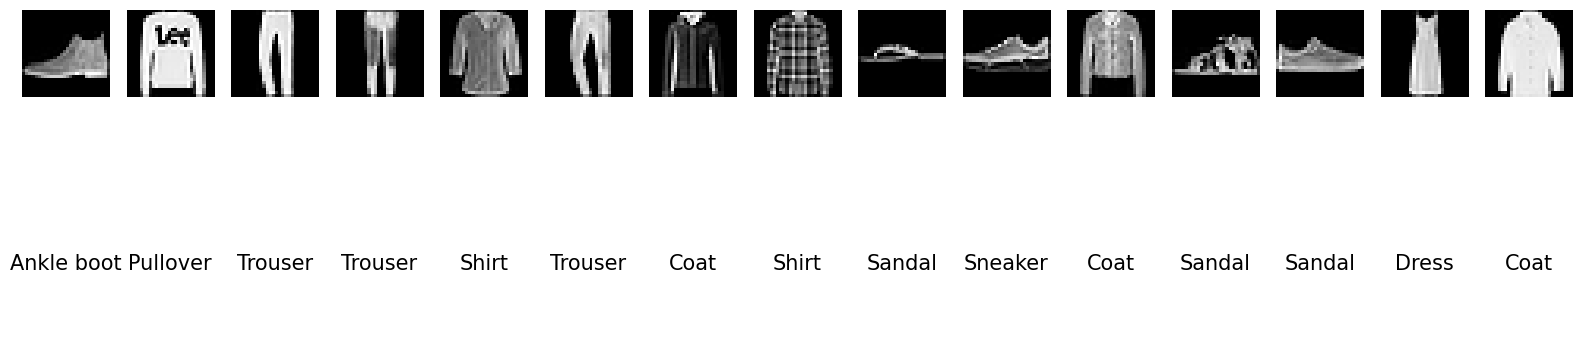

In [15]:
n = len(X_few)
plt.figure(figsize=(20,5))

for i in range(n):
  #Display the orignal image
  ax = plt.subplot(2, n, i+1)
  plt.imshow(X_few[i].reshape(28,28))
  plt.gray()
  plt.axis('off')

  #Display the predicted label
  pred_label = np.argmax(y_few_pred_prob[i])

  # Get the mapping from integer labels to string labels
  label_map = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

  # Convert the predicted label to a string
  pred_label_str = label_map[pred_label]

  ax = plt.subplot(2, n, i+1+n)
  plt.text(0.5, 0.5, str(pred_label_str), fontsize=15, ha='center', va='center')
  plt.axis('off')

plt.show()
plt.close()